# TC5: Signal and Image Processing; Assignment 2 Image filtering

The aim of this assignment is to implement four different filters to a given image.

First, let's import the necessary packages.

In [1]:
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
import pylab as pyl
from scipy import fftpack 
import seaborn as sns
from skimage import io, transform
sns.set()

%matplotlib inline

Next up, the data should be imported. It is assumed that only .jpg files will be imported.

In [2]:
image = imageio.imread('./Data/barbara.jpg')

To see the image that we are working with, we plot it and see a grayscale image of a hooded woman.

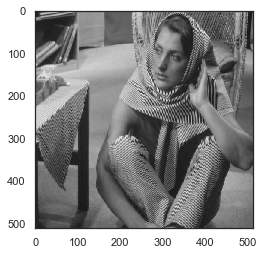

In [3]:
with sns.axes_style("white"):
    plt.imshow(image, cmap='gray')

For some reason, the image is imported as an RGB image (3 colour channels) which are all the same. Thus, only one channel is chosen.

In [4]:
image = image[:,:,0]
image.shape

(512, 512)

Now that we have prepared our image, it is time to start implementing the filters.

## Gradient filter

The gradient filter is chosen to be implemented first. It is implemented by convolving two 3x3 matrices over the image, one being a horizontal edge detector and one being a vertical edge detector. Adding the results from both convolutions gives the edges of both the x and y directions.

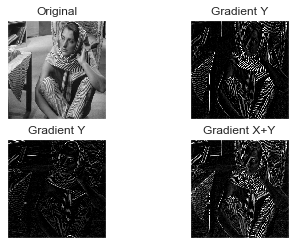

In [5]:
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
edges_x = cv2.filter2D(image,cv2.CV_8U,kernelx)
edges_y = cv2.filter2D(image,cv2.CV_8U,kernely)
all_gradients = edges_x + edges_y

plt.subplot(2,2,1),plt.imshow(image,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(edges_x,cmap = 'gray')
plt.title('Gradient Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(edges_y,cmap = 'gray')
plt.title('Gradient Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(edges_x+edges_y,cmap='gray')
plt.title('Gradient X+Y'), plt.xticks([]), plt.yticks([])
plt.show()

As was expected, the first convolution (with the horizontal matrix) gives the gradients in the y, or vertical, direction, and the second convolution (with the vertical matrix) gives the gradients in the x, or horizontal direction. This is especially apparent at the headscarf of the woman in the picture. In the first plot, only the sides are obviously portrayed, while the top is portrayed much better in the second plot.

By combining the results using summation, all the edges in the image are portrayed in the last plot.

## Sobel filter

Secondly, a Sobel filter is applied to the image. The Sobel filter acts in a similar way as the gradient filter, though the values in the 3x3 matrix differ slightly: The middle cell of the top & bottom rows and left & right columns has a factor 2 applied to it. Let's see what it does.

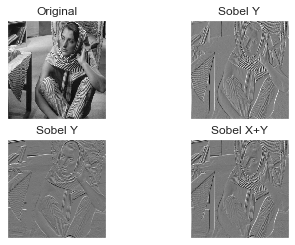

In [6]:
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(image,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobelx+sobely,cmap='gray')
plt.title('Sobel X+Y'), plt.xticks([]), plt.yticks([])
plt.show()

As is apparent, the y and x filter results are more similar than in the results of the gradient filter. This can be explained by the difference in 3x3 matrix that is used. In the Sobel filter, the horizontal 3x3 matrix also has some vertical information in there due to the factor two in the middle of its rows and columns and is therefore able to capture more information than the gradient filter of 1 direction.

It is also visible that the results from the Sobel filter results that instead of a black background for the gradient filter, the Sobel filter results have a gray background indicating the absence of edges.

Performance-wise, the Sobel filter results in slightly 'cleaner' edges, meaning that they are more pronounced and there are fewer faint, or non-interesting, edges than in the gradient filter results. 

## Averaging filter

Thirdly, an averaging filter is applied to the image. This filter is much simpler than the other filters as the 3x3 matrix convolved over the image is just an array of 1/9.

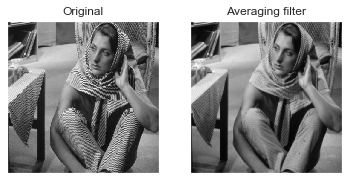

In [7]:
avg_filter = np.ones((3,3),np.float32)/9
avg_img = cv2.filter2D(image, -1, avg_filter)

plt.subplot(1,2,1),plt.imshow(image,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(avg_img,cmap = 'gray')
plt.title('Averaging filter'), plt.xticks([]), plt.yticks([])
plt.show()

The result from the convolution of the image with an averaging filter is a much smoother image. This is especially apparent in the checkerboard texture of the pants and hood of the woman in the picture. In the original picture they are clearly visible and in the result from the filtering it is much less visible.

## Gaussian filter

Finally, a Gaussian filter is applied to the image. This filter also convolves the image with a 3x3 matrix, though the values in the matrix are different to the ones we have seen in the previous filters. In a Gaussian filter, the centre of the matrix has the highest value with the fields around it decreasing in value according to the Gaussian function.

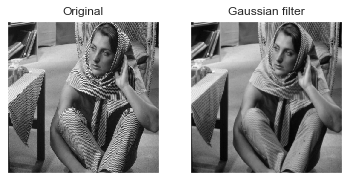

In [8]:
gauss = cv2.GaussianBlur(image, (3,3), 1)

plt.subplot(1,2,1),plt.imshow(image,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(gauss,cmap = 'gray')
plt.title('Gaussian filter'), plt.xticks([]), plt.yticks([])
plt.show()

As is visible in the results, the Gaussian filter gives a similar result to the averaging filter. To see the differences better, I will plot them next to each other.

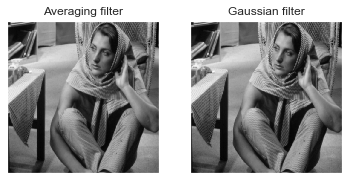

In [9]:
plt.subplot(1,2,1),plt.imshow(avg_img,cmap = 'gray')
plt.title('Averaging filter'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(gauss,cmap = 'gray')
plt.title('Gaussian filter'), plt.xticks([]), plt.yticks([])
plt.show()

On the pants and the table cloth, it is visible that the Gaussian filter does a slightly better job at keeping the edges in the image. Besides, the two results are very similar.